In [1]:
from unet.data_functions import *
from unet.model import *

Using TensorFlow backend.


In [19]:
train_path = r'D:\Clarifruit\cherry_stem\data\unet_data\train'
test_path = r'D:\Clarifruit\cherry_stem\data\unet_data\test'
test_aug_path = os.path.join(test_path, 'aug')

target_size = (576,576)
modes_dict = {'grayscale': 1, 'rgb': 3}

color_mode = 'rgb'

x_folder_name = 'image'
y_folder_name = 'label'

x_prefix = 'image'
y_prefix = 'label'

weights_file_name = 'unet_cherry_stem.hdfs5'
input_size = (*target_size, modes_dict[color_mode])

data_gen_args = dict(rescale=1./255,
                     rotation_range=0.5,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')

In [20]:

train_generator, val_generator = clarifruit_train_val_generators(batch_size=10,
                                       src_path=train_path,
                                       image_folder=x_folder_name,
                                       mask_folder=y_folder_name,
                                       aug_dict=data_gen_args,
                                       image_color_mode=color_mode,
                                       mask_color_mode='grayscale',
                                       image_save_prefix=x_prefix,
                                       mask_save_prefix=y_prefix,
                                       save_to_dir=None,
                                       target_size=target_size,
                                       seed=1)

Found 107 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 107 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


In [21]:
from datetime import datetime
logs_path = r"D:\Clarifruit\cherry_stem\data\unet_data\logs\fit"
logs_path = r"data\unet_data\logs\fit"

log_dir=logs_path + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logs_path, histogram_freq=0)

In [22]:
%load_ext tensorboard


In [20]:
%reload_ext tensorboard

In [23]:
%tensorboard --logdir {log_dir} --host localhost

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
TensorBoard 1.14.0 at http://localhost:6006/ (Press CTRL+C to quit)

In [13]:
taskkill /F /PID 34652

UsageError: Line magic function `%taskkill` not found.


In [24]:
del /q %TMP%\.tensorboard-info\*
taskkill /im tensorboard.exe /f

SyntaxError: invalid syntax (<ipython-input-24-304ec2f0c1d4>, line 1)

In [25]:
model = unet(input_size=input_size,pretrained_weights=weights_file_name)
early_stoping = EarlyStopping(monitor='val_loss',verbose=1, patience=3)
model_checkpoint = ModelCheckpoint(weights_file_name, monitor='loss', verbose=1, save_best_only=True)


In [26]:
epochs=10
steps_per_epoch = 2000
validation_steps = 100

In [6]:
model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_generator, 
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=[early_stoping,model_checkpoint])



Epoch 1/3
200/200 [==============================] - 225s 1s/step - loss: 0.0278 - acc: 0.9336 - val_loss: 0.0598 - val_acc: 0.9231

Epoch 00001: loss improved from inf to 0.02784, saving model to unet_cherry_stem.hdfs5
Epoch 2/3
200/200 [==============================] - 211s 1s/step - loss: 0.0212 - acc: 0.9343 - val_loss: 0.0460 - val_acc: 0.9243

Epoch 00002: loss improved from 0.02784 to 0.02125, saving model to unet_cherry_stem.hdfs5
Epoch 3/3
200/200 [==============================] - 210s 1s/step - loss: 0.0211 - acc: 0.9340 - val_loss: 0.0460 - val_acc: 0.9239

Epoch 00003: loss improved from 0.02125 to 0.02112, saving model to unet_cherry_stem.hdfs5


In [5]:
test_path_image = os.path.join(test_path,x_folder_name)
pred_path = os.path.join(test_path,'pred')
#prediction(model, test_path_image, pred_path, target_size,threshold=0.5,as_gray=False)


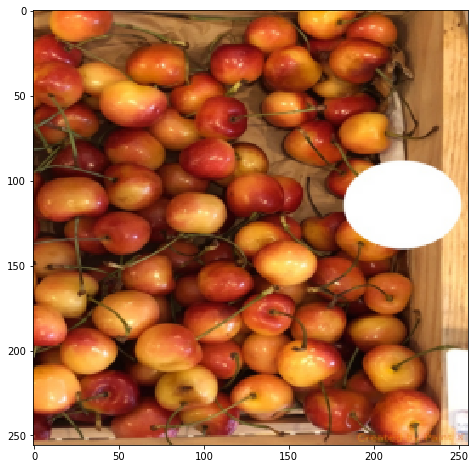

In [18]:
import cv2
import matplotlib.pyplot as plt

test_img_path = os.path.join(pred_path,'38357-62566.png.png')
test_img = cv2.imread(test_img_path,cv2.IMREAD_UNCHANGED)
test_mask_path = os.path.join(pred_path,'38357-62566.png_predict.png')
test_mask = cv2.imread(test_mask_path,cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))



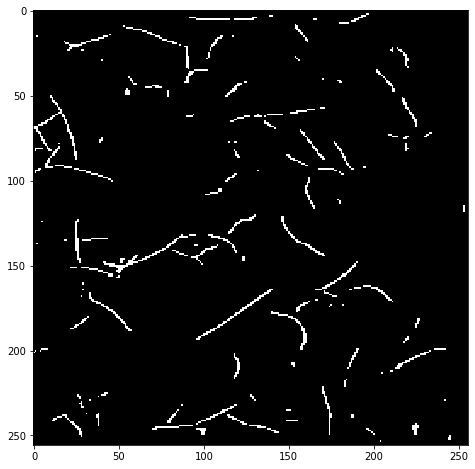

In [29]:
plt.figure(figsize=(8,8))
plt.imshow(test_mask,cmap='gray')


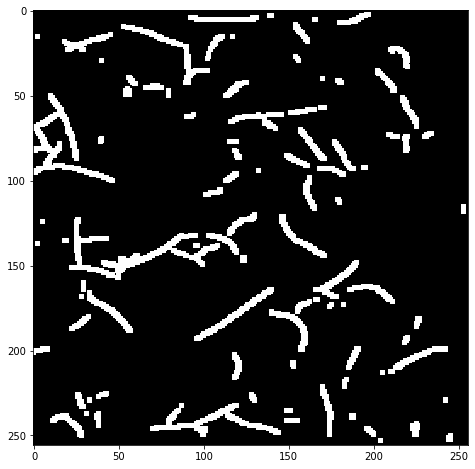

In [32]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(test_mask,kernel,iterations = 1)
plt.figure(figsize=(8,8))
plt.imshow(dilation,cmap='gray')


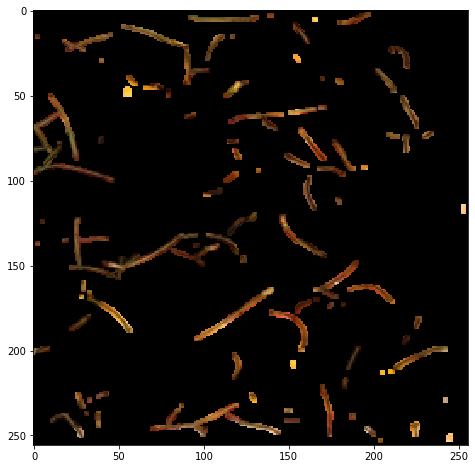

In [34]:
src1_mask=cv2.cvtColor(dilation,cv2.COLOR_GRAY2BGR)#change mask to a 3 channel image 
mask_out=cv2.subtract(src1_mask,test_img)
mask_out=cv2.subtract(src1_mask,mask_out)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(mask_out, cv2.COLOR_BGR2RGB))